<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/11_workalong_01_fft.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook explores Fourier transforms and the `numpy.fft` package on some simple examples and realistic problems.

In [2]:
""" Import libraries. """
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

Text(0.5, 1.0, 'Signal')

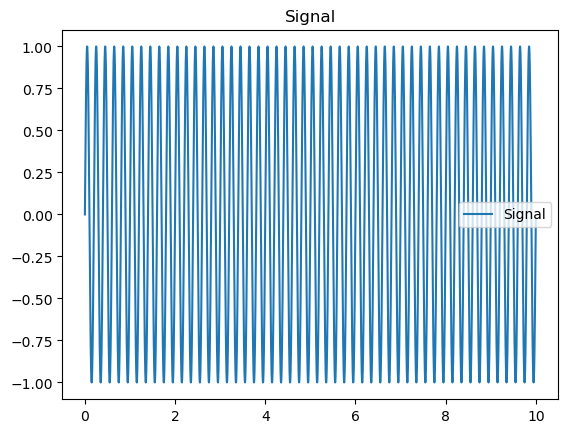

In [4]:
""" Create and plot a test signal. """

friquency = 5 # Hz

# create time variable
dt = 0.001 # seconds
t = np.arange(0, 10, dt)

# create signal
signal = np.sin(2 * np.pi * friquency * t)

# plot signal with legend and title
plt.plot(t, signal, label='Signal')
plt.legend()
plt.title('Signal')

Text(0, 0.5, 'Power')

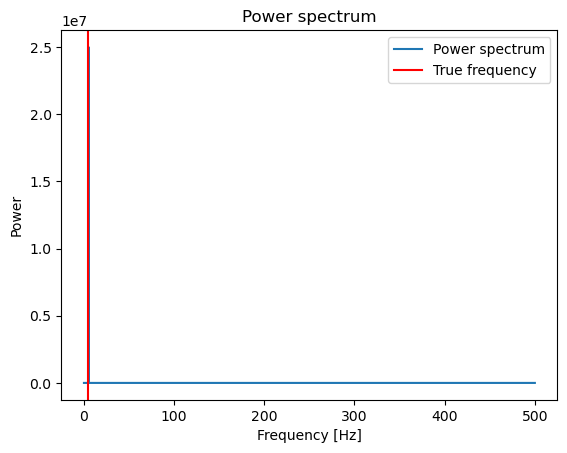

In [10]:
""" Compute the FFT of the test signal. """

# do the FFT
fft_signal = fft.rfft(signal)

# compure power spectrum
power = np.abs(fft_signal) ** 2

# compute frequencies
freqs = fft.rfftfreq(len(signal), dt)

# plot power spectrum set labels and title
plt.figure()
plt.plot(freqs, power, label='Power spectrum')

# plot the known frequency
plt.axvline(friquency, color='red', label='True frequency')

plt.legend()
plt.title('Power spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')



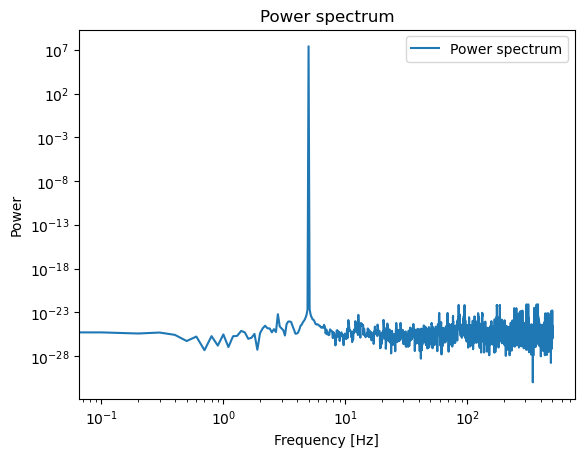

In [11]:
""" Make a function to compute the power spectrum of a signal. """

def power_spectrum(y, t):
    """ Compute the power spectrum of a signal. Returns frequencies and the power spectrum: freqs, y_power """
    # do the FFT
    fft_signal = fft.rfft(y)

    # compure power spectrum
    power = np.abs(fft_signal) ** 2

    # compute frequencies
    freqs = fft.rfftfreq(len(y), t[1] - t[0])

    return freqs, power

# also make a function for plotting
def plot_power_spectrum(freqs, y_power):
    """ Plots the power spectrum of a signal.  Returns the figure and axes: fig, ax """
    plt.figure()
    # plot power spectrum set labels and title
    plt.plot(freqs, y_power, label='Power spectrum')
    

    # plot in log scale
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.title('Power spectrum')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power')

    # return the figure and axes
    return plt.gcf(), plt.gca()

""" Test the functions. """
freqs, power = power_spectrum(signal, t)
fig, ax = plot_power_spectrum(freqs, power)

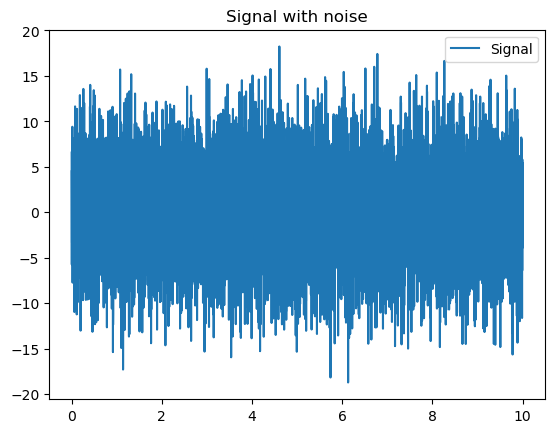

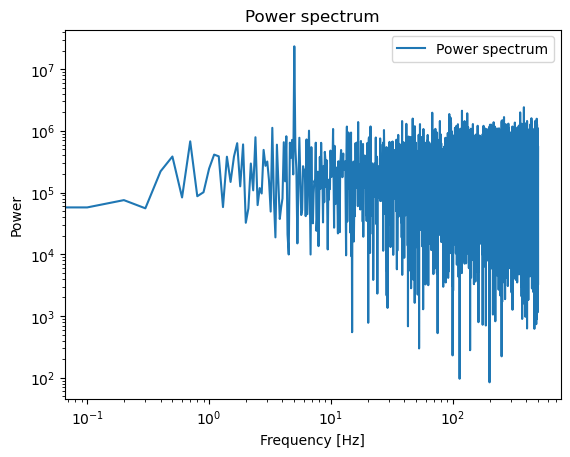

In [16]:
""" Get the power spectrum with noise added. """

y_noise = signal + np.random.normal(0,5,len(signal))

# plot signal with legend and title
plt.plot(t, y_noise, label='Signal')
plt.legend()
plt.title('Signal with noise')

# compute power spectrum
freqs, power = power_spectrum(y_noise, t)
plt.figure()
fig, ax = plot_power_spectrum(freqs, power)



# Real data

Download this data file: https://github.com/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/cannelton_flow.dat

The data file was obtained from https://waterdata.usgs.gov/nwis/dv/?site_no=03303280&PARAmeter_cd=00060 on 11/10/23 at about 11:16 AM Eastern.  It represents daily stream flow from 1975-present at a gauge on the Ohio River in Cannelton, IN

In [27]:
""" Load the data file. """

import pandas as pd

# load the data skip the header
data = pd.read_csv('cannelton_flow.dat', skiprows=30, sep='\s+', header=None, names=['agency_cd', 'site_no', 'datetime','discharge', 'useless'])

discharge = data['discharge'].values
datetime = pd.to_datetime(data['datetime'])


data.head()


,agency_cd,site_no,datetime,discharge,useless
0,USGS,3303280,1975-10-01,94800,A
1,USGS,3303280,1975-10-02,79900,A
2,USGS,3303280,1975-10-03,69000,A
3,USGS,3303280,1975-10-04,74700,A
4,USGS,3303280,1975-10-05,71700,A


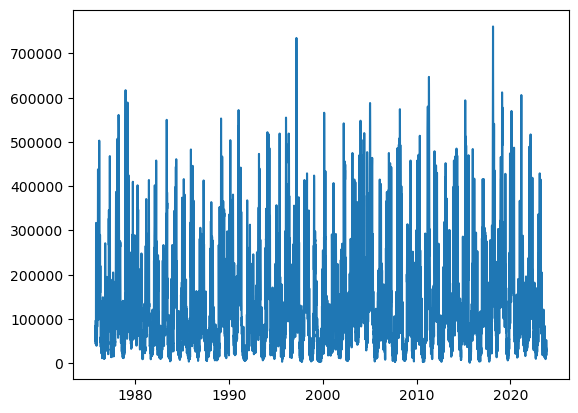

In [29]:
""" Plot a time series of the data. """

plt.figure()
plt.plot(datetime, discharge)

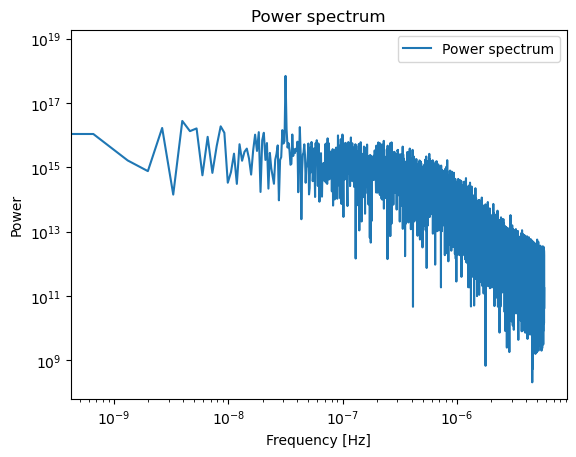

In [36]:
""" Plot the power spectrum of the data. """

# change datetime to integers
datetime_int = datetime.astype(int) / 10**9


freqs, power = power_spectrum(discharge, datetime_int)
fig, ax = plot_power_spectrum(freqs, power)

/var/folders/qk/d2qw5j9x1h3cmpy31fr930ym0000gt/T/ipykernel_80170/2660174702.py:4: RuntimeWarning: divide by zero encountered in divide
  period = 1 / freqs


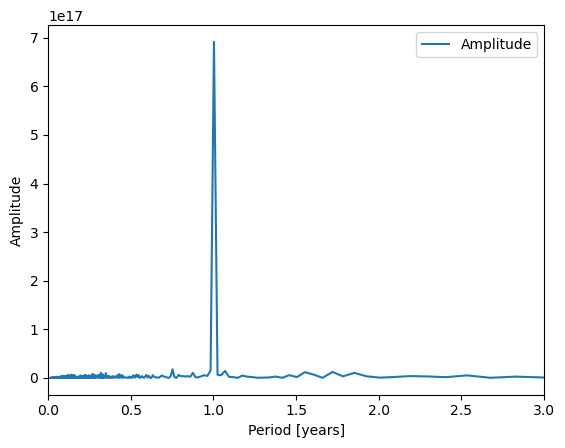

In [44]:
""" Plot the power spectrum of the data with the x-axis as period instead. """

# change frequency to period
period = 1 / freqs

# change second to year
period = period / 60 / 60 / 24 / 365

plt.plot(period, power, label='Amplitude')

# set xlim
plt.xlim(0, 3)
plt.xlabel('Period [years]')
plt.ylabel('Amplitude')
plt.legend()
